In [1]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.sparse.linalg import eigsh
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('axes',edgecolor='white')

In [3]:
N=[18,24,30]
spectrum_trion=[]
spectrum_exciton=[]
omega_trion=[]
omega_exciton=[]
for n in N:
    Exciton=ExcitonMoS2(epsilon=2.5,N=n,vb=[12,13],cb=[14,15],spin_orbit=True,cutoff=0.6,shift=0.7)
    Exciton.constructTrionBasis()
    Exciton.constructTrionHamiltonian()
    Exciton.constuctExcitonHamiltonian()
    Exciton.calculateAbsobtionSpectrumTrion(eta=0.001,n_iter=100)
    Exciton.calculateAbsobtionSpectrum(eta=0.001,n_iter=100)
    
    spectrum_trion.append(-Exciton.trion_eps.imag)
    spectrum_exciton.append(-Exciton.eps.imag)
    
    omega_trion.append(Exciton.trion_omega.real-Exciton.trion_spectrum_shift)
    omega_exciton.append(Exciton.omega)
    
    print(n)

18
24
30


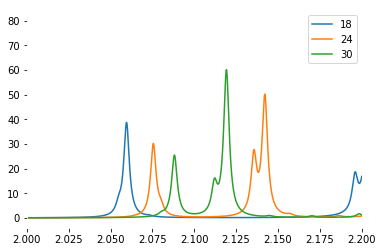

In [10]:
for i in range(len(N)):
    plt.plot(omega_trion[i],spectrum_trion[i],label=N[i])
plt.xlim([2.0,2.2])
plt.legend()

/home/drg/.local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


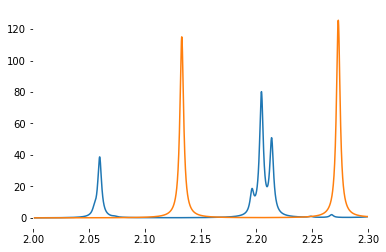

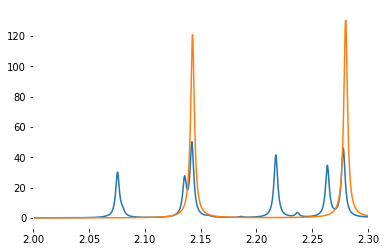

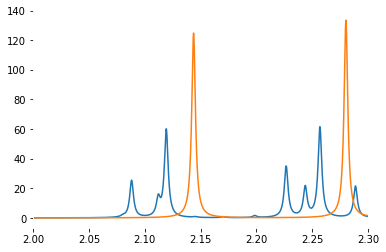

In [5]:
for i in range(len(N)):
    plt.figure()
    plt.plot(omega_trion[i],spectrum_trion[i])
    plt.plot(omega_exciton[i],spectrum_exciton[i])
    plt.xlim([2.0,2.3])
# plt.legend()

In [11]:
trion_peaks=[]
exciton_peak=[]
trion_strenght=[]
exciton_strenght=[]
for i in range(len(N)):
    peak,prop=find_peaks(spectrum_trion[i],height=10)
    trion_peaks.append(omega_trion[i][peak[0]])
    trion_strenght.append(prop['peak_heights'][0])
    peak,prop=find_peaks(spectrum_exciton[i],height=10)
    exciton_peak.append(omega_exciton[i][peak[0]])
    exciton_strenght.append(prop['peak_heights'][0])
trion_peaks=np.array(trion_peaks)
exciton_peak=np.array(exciton_peak)
trion_strenght=np.array(trion_strenght)
exciton_strenght=np.array(exciton_strenght)

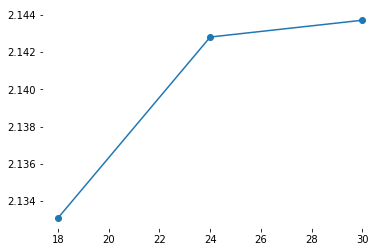

In [12]:
plt.plot(N,exciton_peak,'-o')

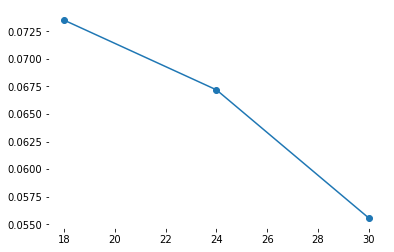

In [13]:
plt.plot(N,exciton_peak-trion_peaks,'-o')

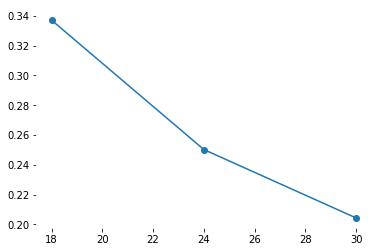

In [14]:
plt.plot(N,trion_strenght/exciton_strenght,'-o')